In [42]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.manifold import TSNE

In [43]:
#reading the file and assigning name to file's data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC GENERAL.csv')
print(df)
data=df

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [44]:
#Shows the data heading and last 10 rows of data
data.head(10)
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [45]:
type(data)
data.shape

(8950, 18)

In [46]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [47]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [49]:
#to identify null values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [50]:
#to remove null values by taking mean of the column for minimum_payments and credit_limit.

data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [52]:
#to check for any duplicates.
data.duplicated().sum()

0

In [53]:
#dropping column 'CUST_ID' as it is not useful for the given problem statement
data.drop('CUST_ID', axis = 1, inplace= True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [54]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

In [55]:
scaled_data_df

array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [56]:
important_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
final_data = df[important_columns].dropna()

<Axes: >

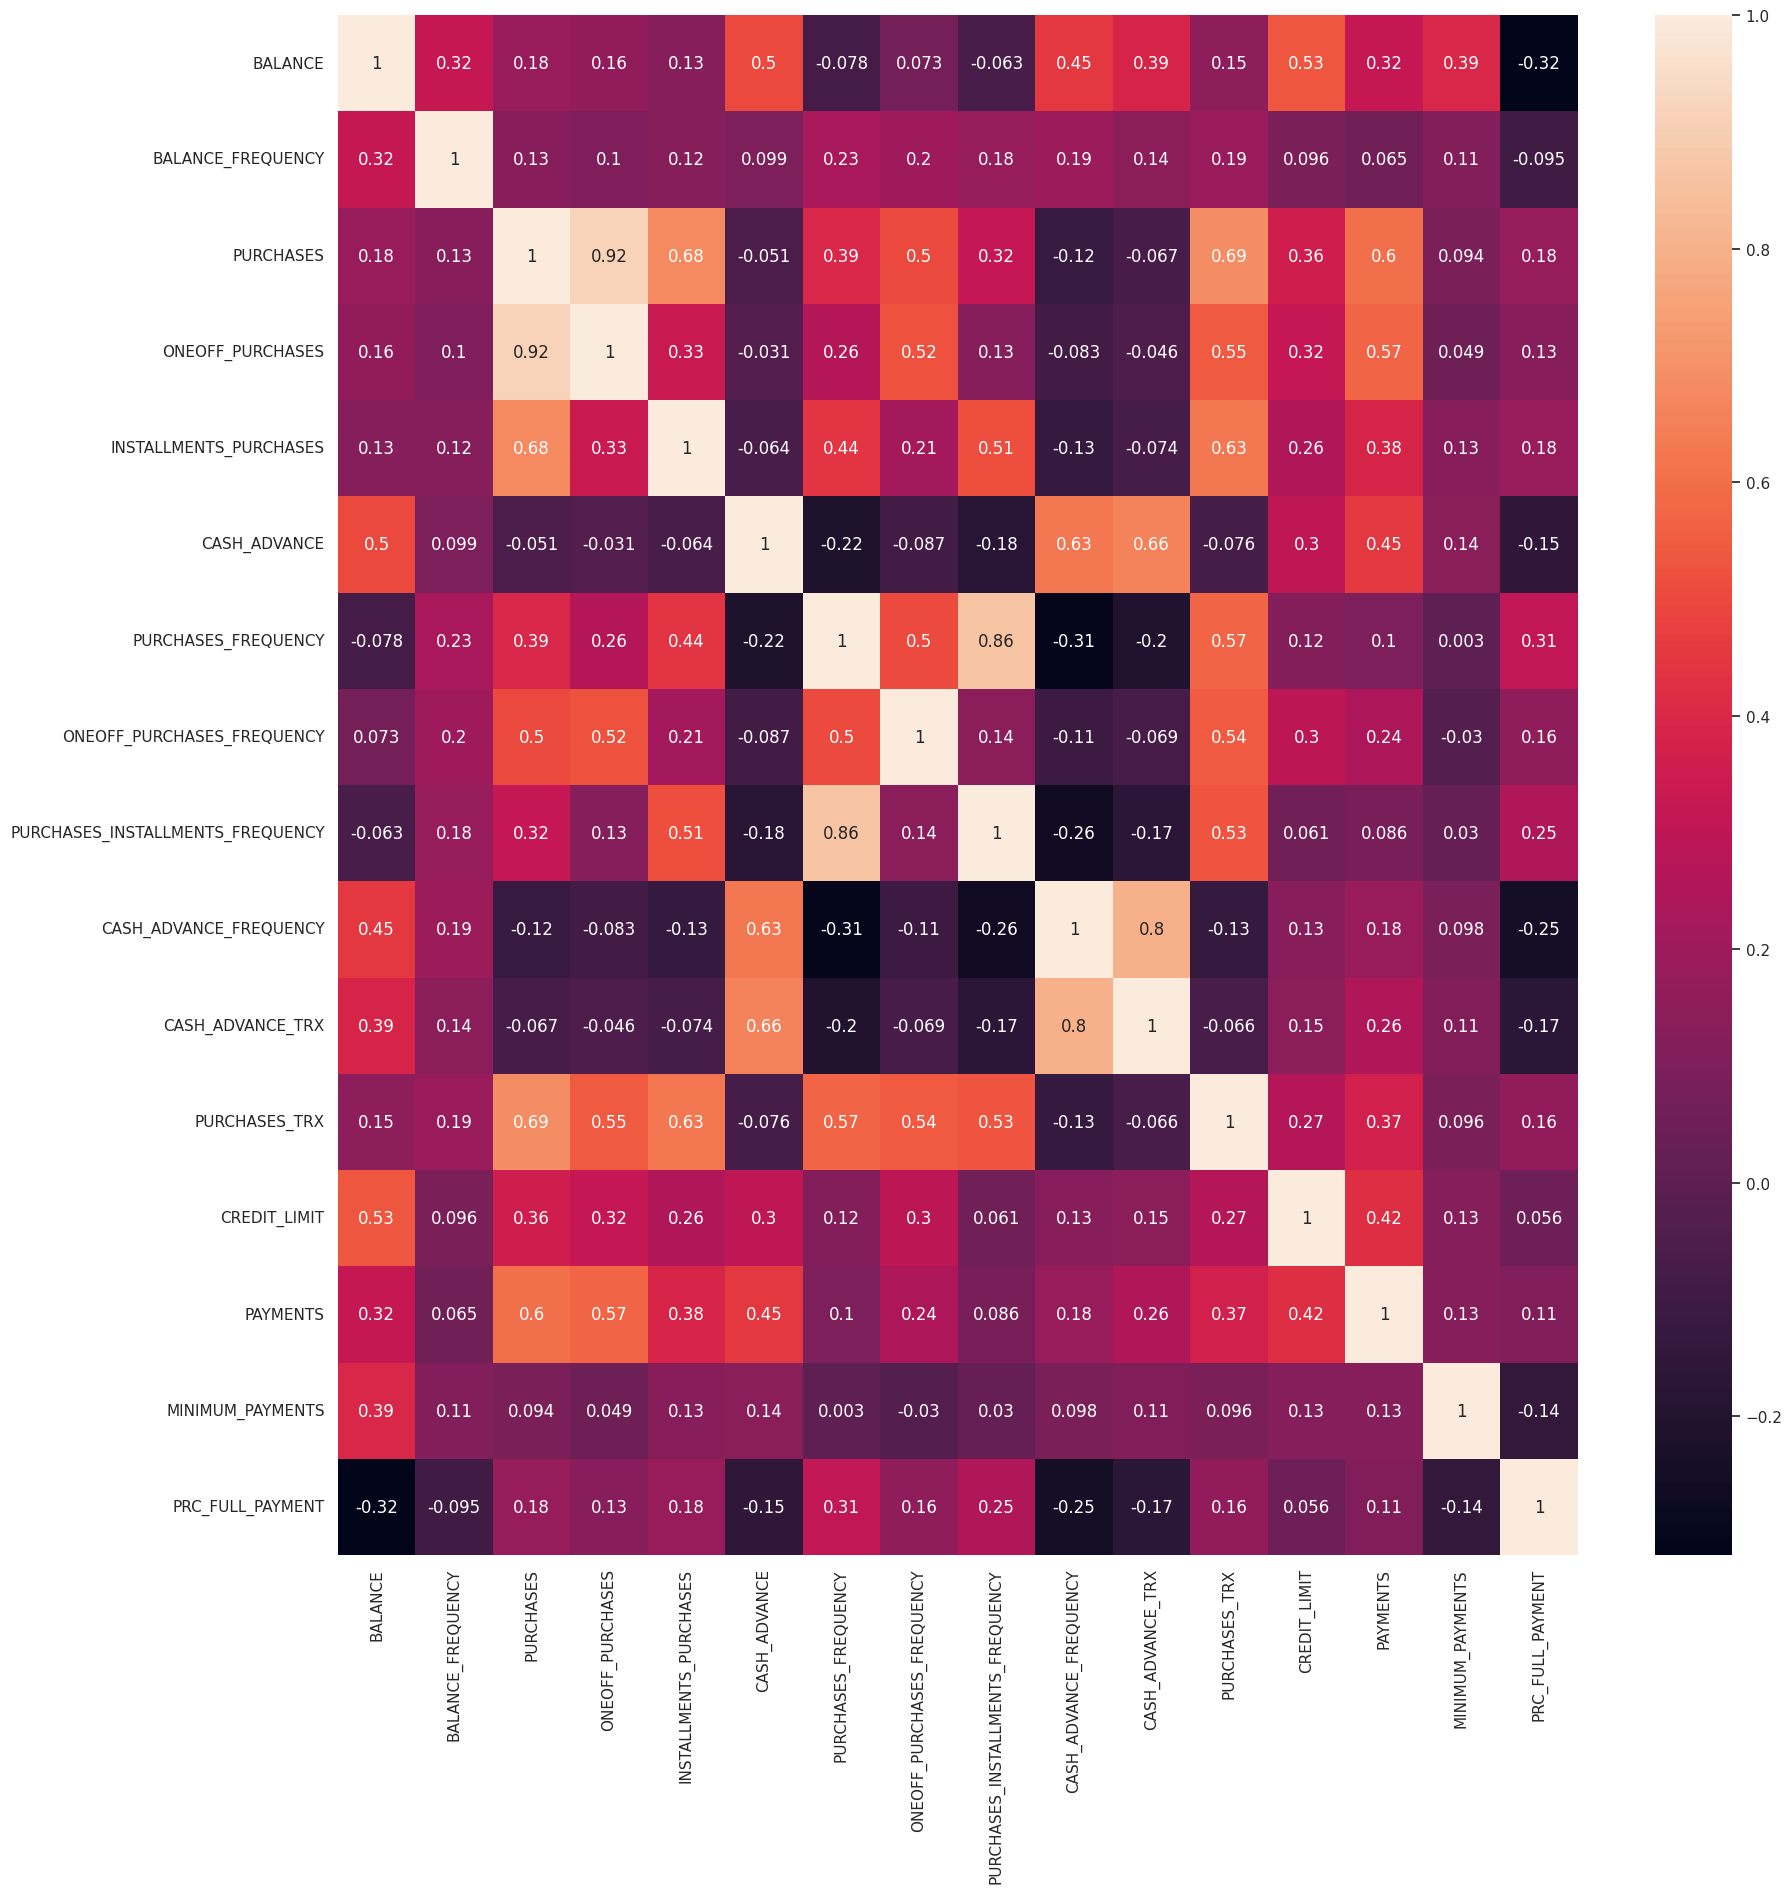

In [57]:
corr_matrix = final_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True)

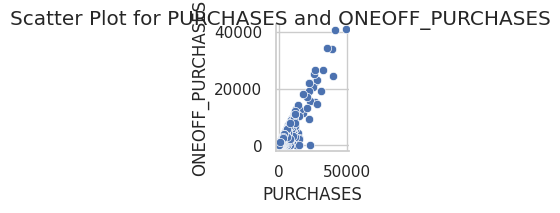

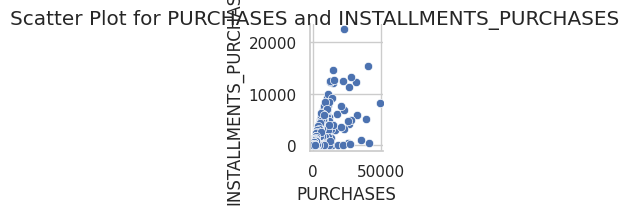

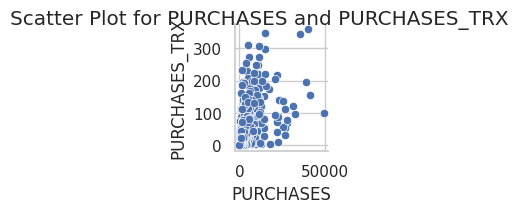

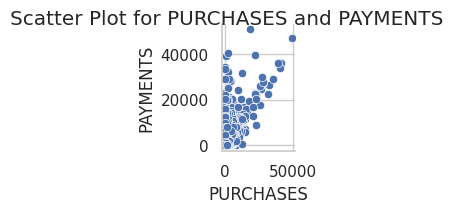

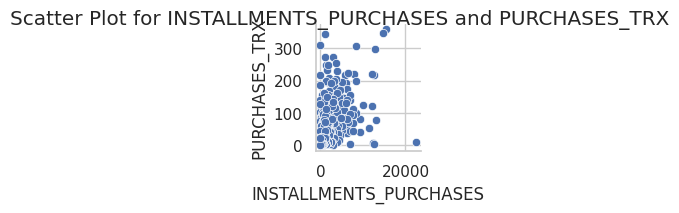

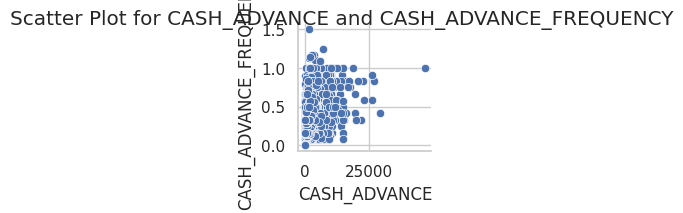

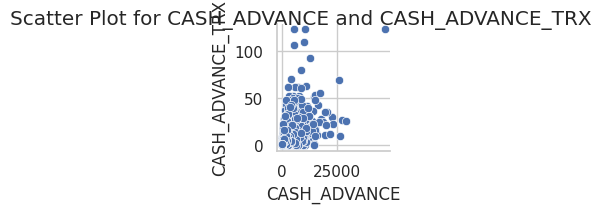

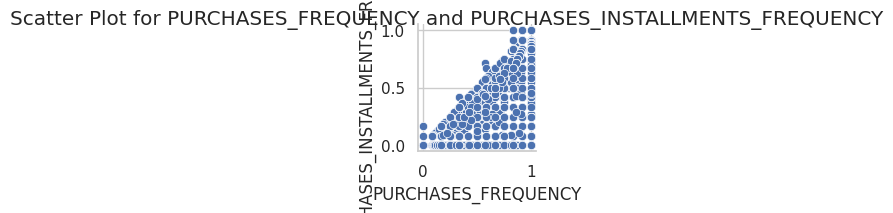

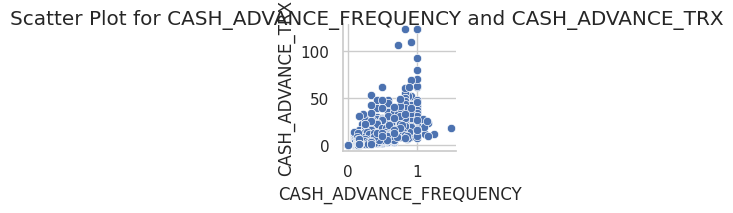

In [58]:
# Find pairs of columns with correlation greater than 0.60or less than -0.6
high_corr_pairs = []
checked = set()
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# scatter plot matrix for the selected pairs
for pair in high_corr_pairs:
    sns.pairplot(final_data, height=2, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.02)
    plt.show()

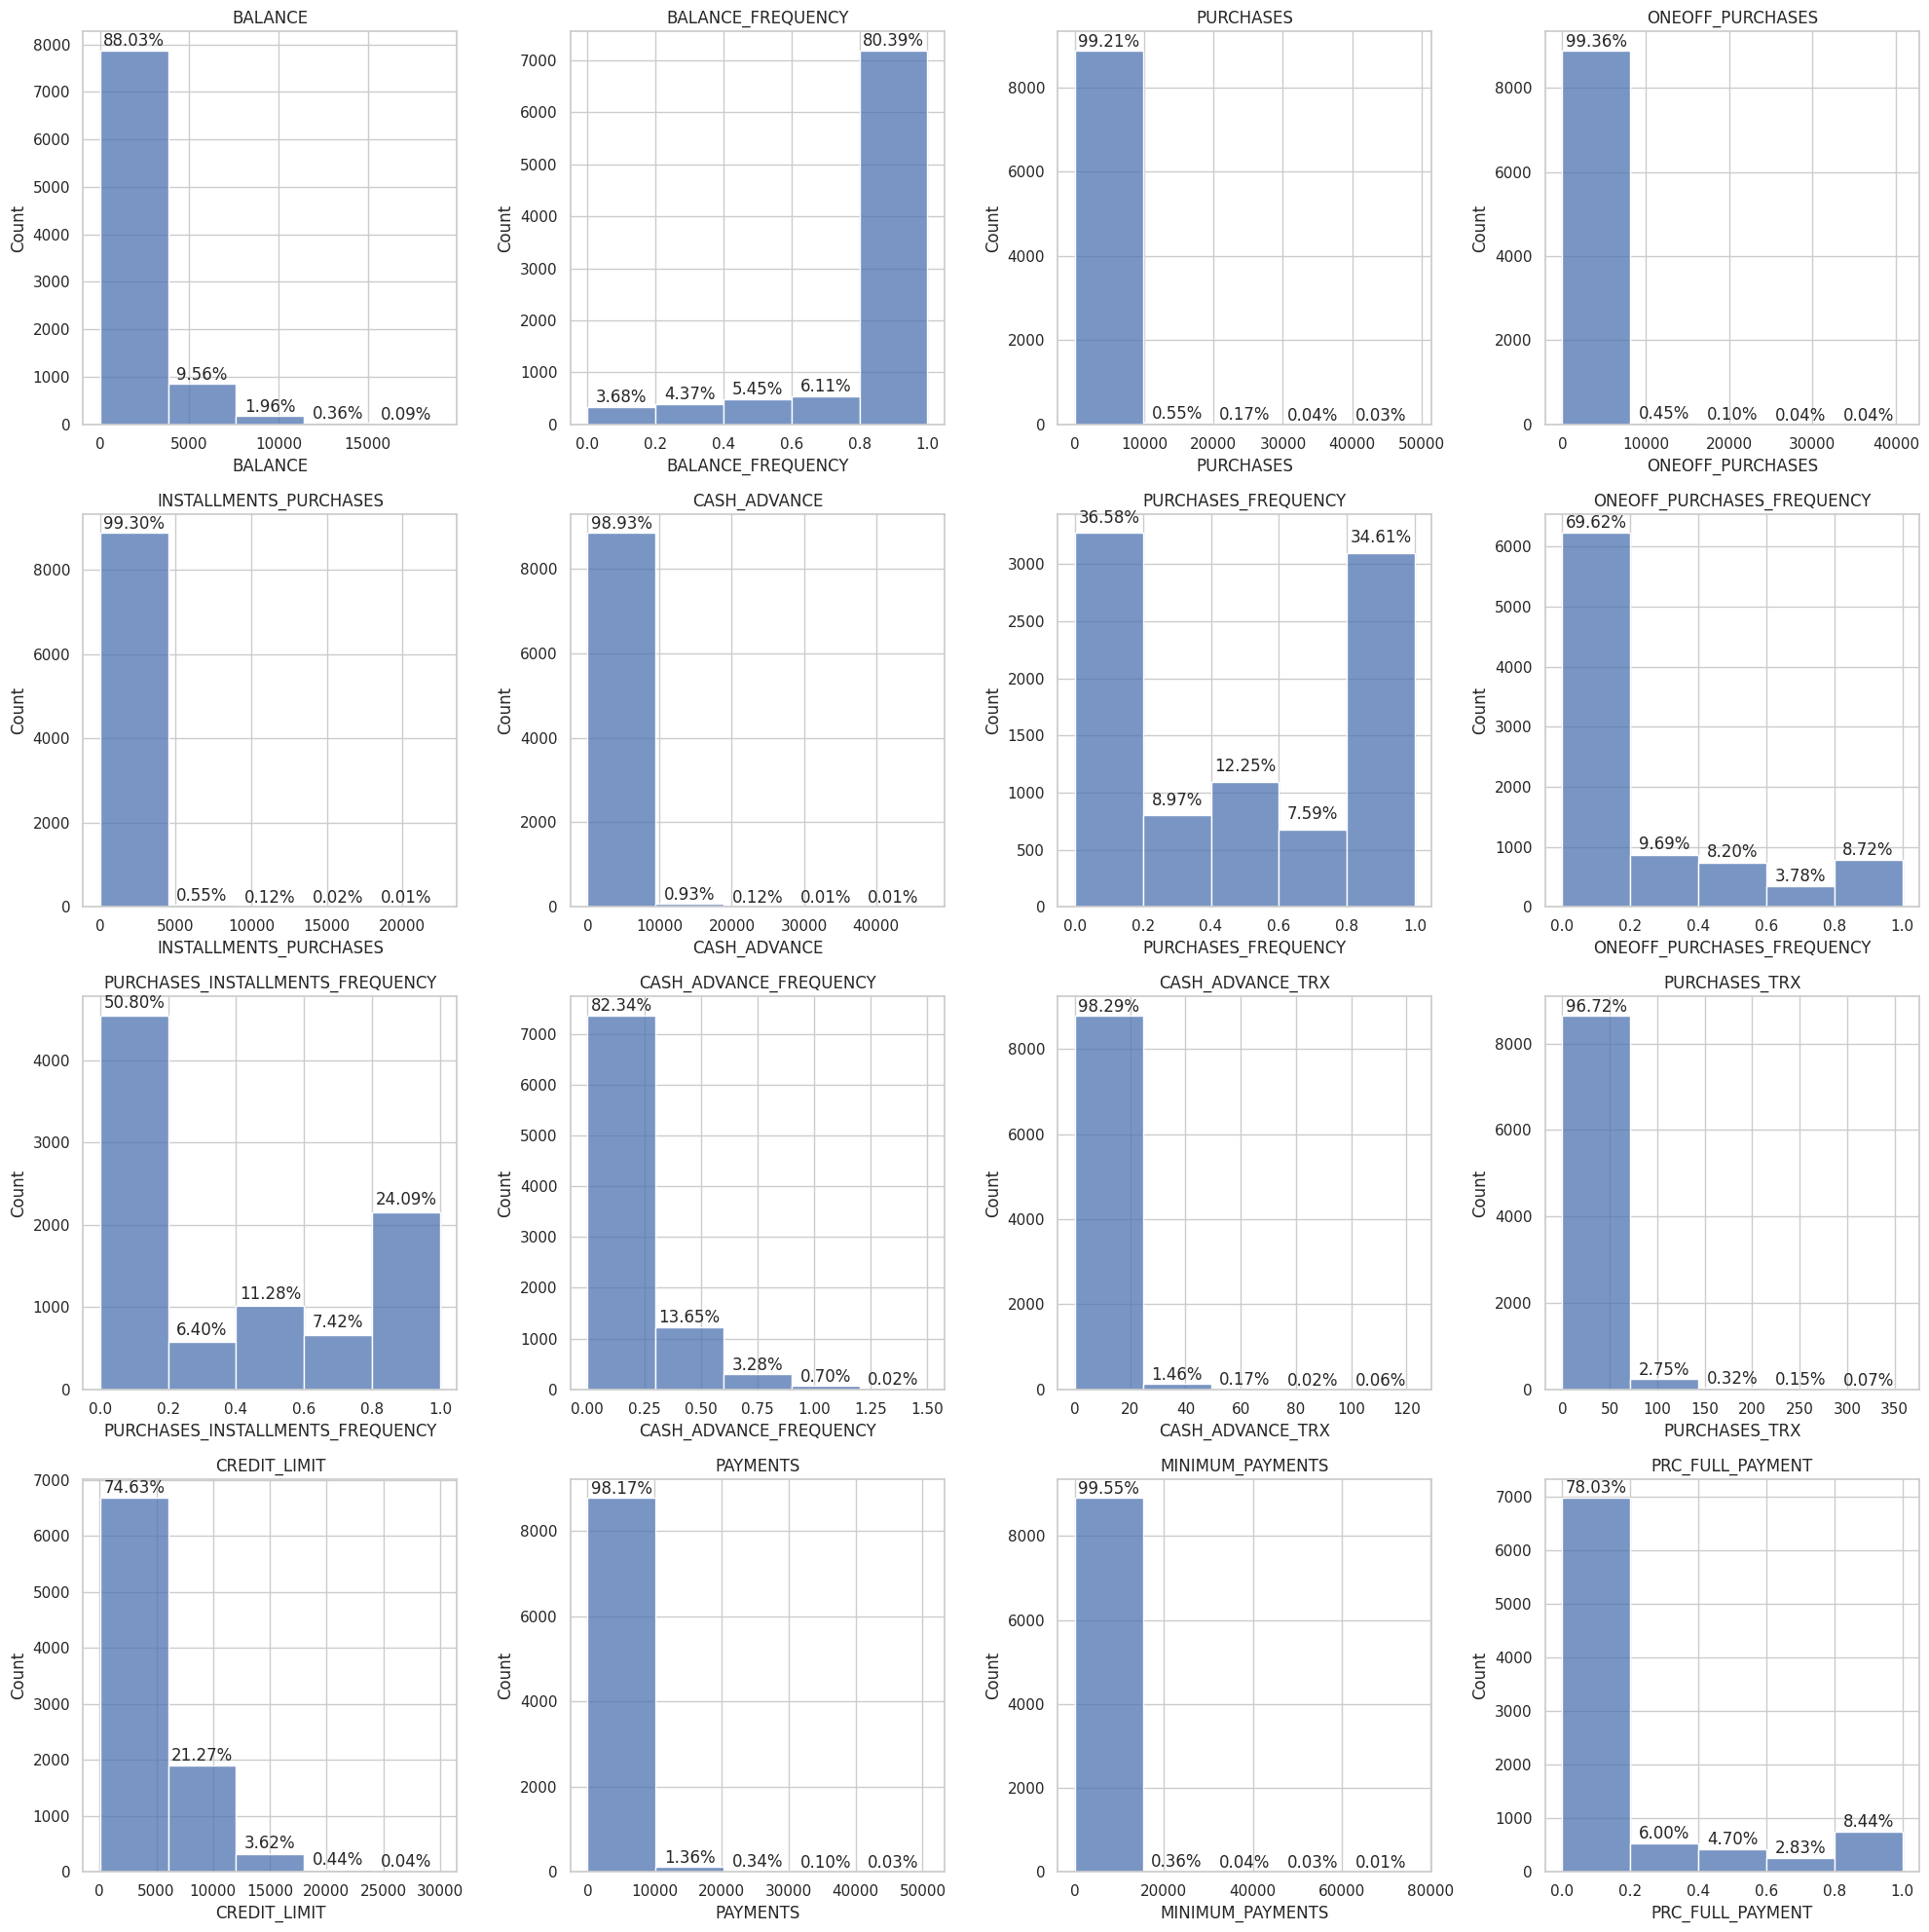

In [59]:
# Histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(important_columns):
    row, col_num = divmod(i, 4)
    sns.histplot(final_data[col], bins=5, kde=False, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

    # percentage
    total = len(final_data[col])
    for p in axes[row, col_num].patches:
        height = p.get_height()
        axes[row, col_num].text(p.get_x() + p.get_width() / 2.,
                                height + 0.01 * total,
                                '{:.2%}'.format(height / total),
                                ha="center")

plt.tight_layout()
plt.show()

<ipython-input-60-0291c28c6c35>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, ax=axes_box[i], linewidth=1.0, palette='Blues', data=df)
<ipython-input-60-0291c28c6c35>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, ax=axes_box[i], linewidth=1.0, palette='Blues', data=df)
<ipython-input-60-0291c28c6c35>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, ax=axes_box[i], linewidth=1.0, palette='Blues', data=df)
<ipython-input-60-0291c28c6c35>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

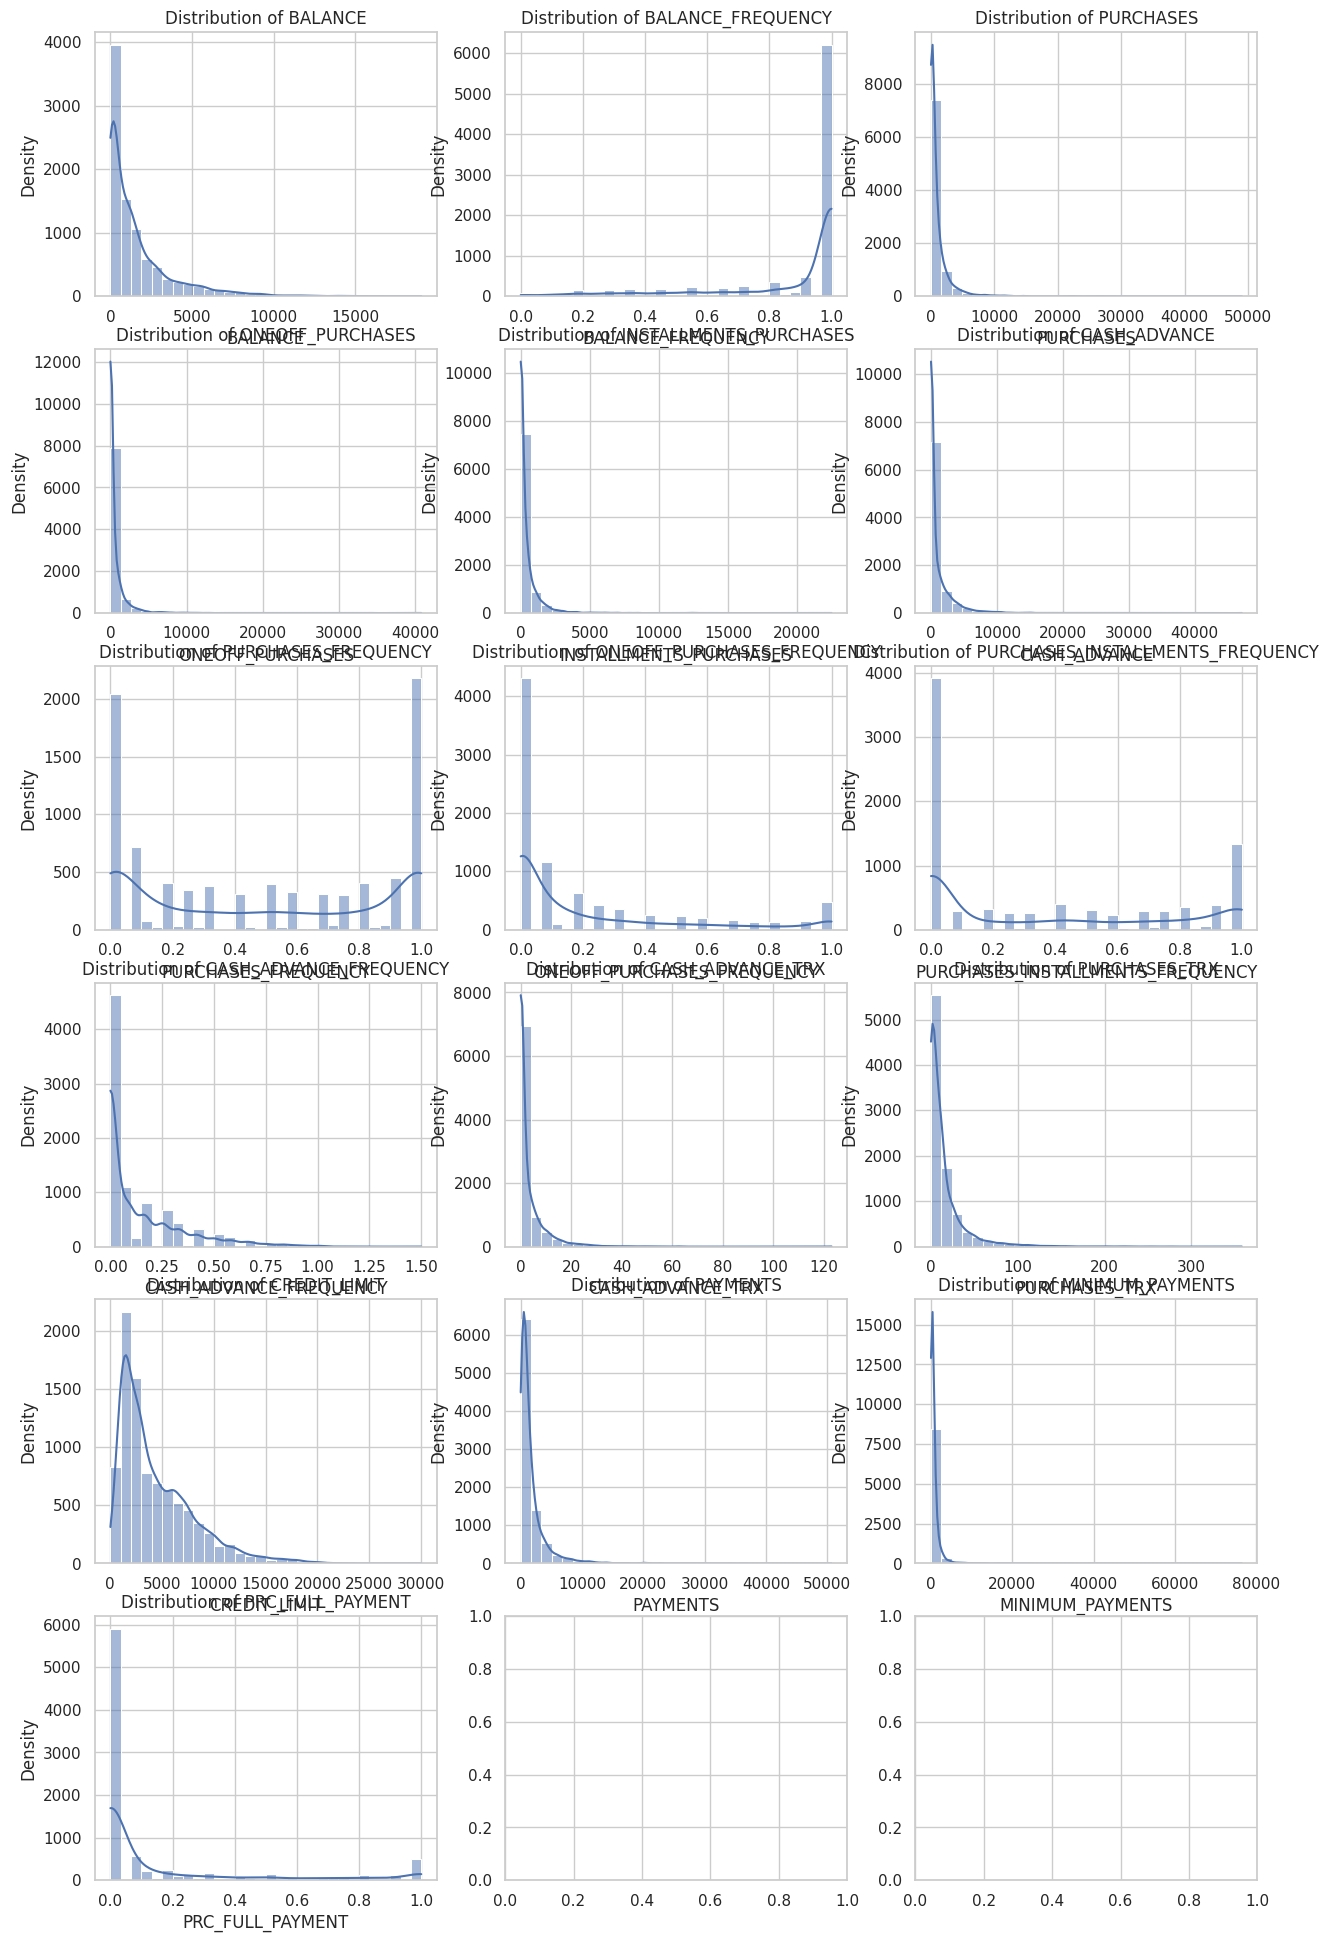

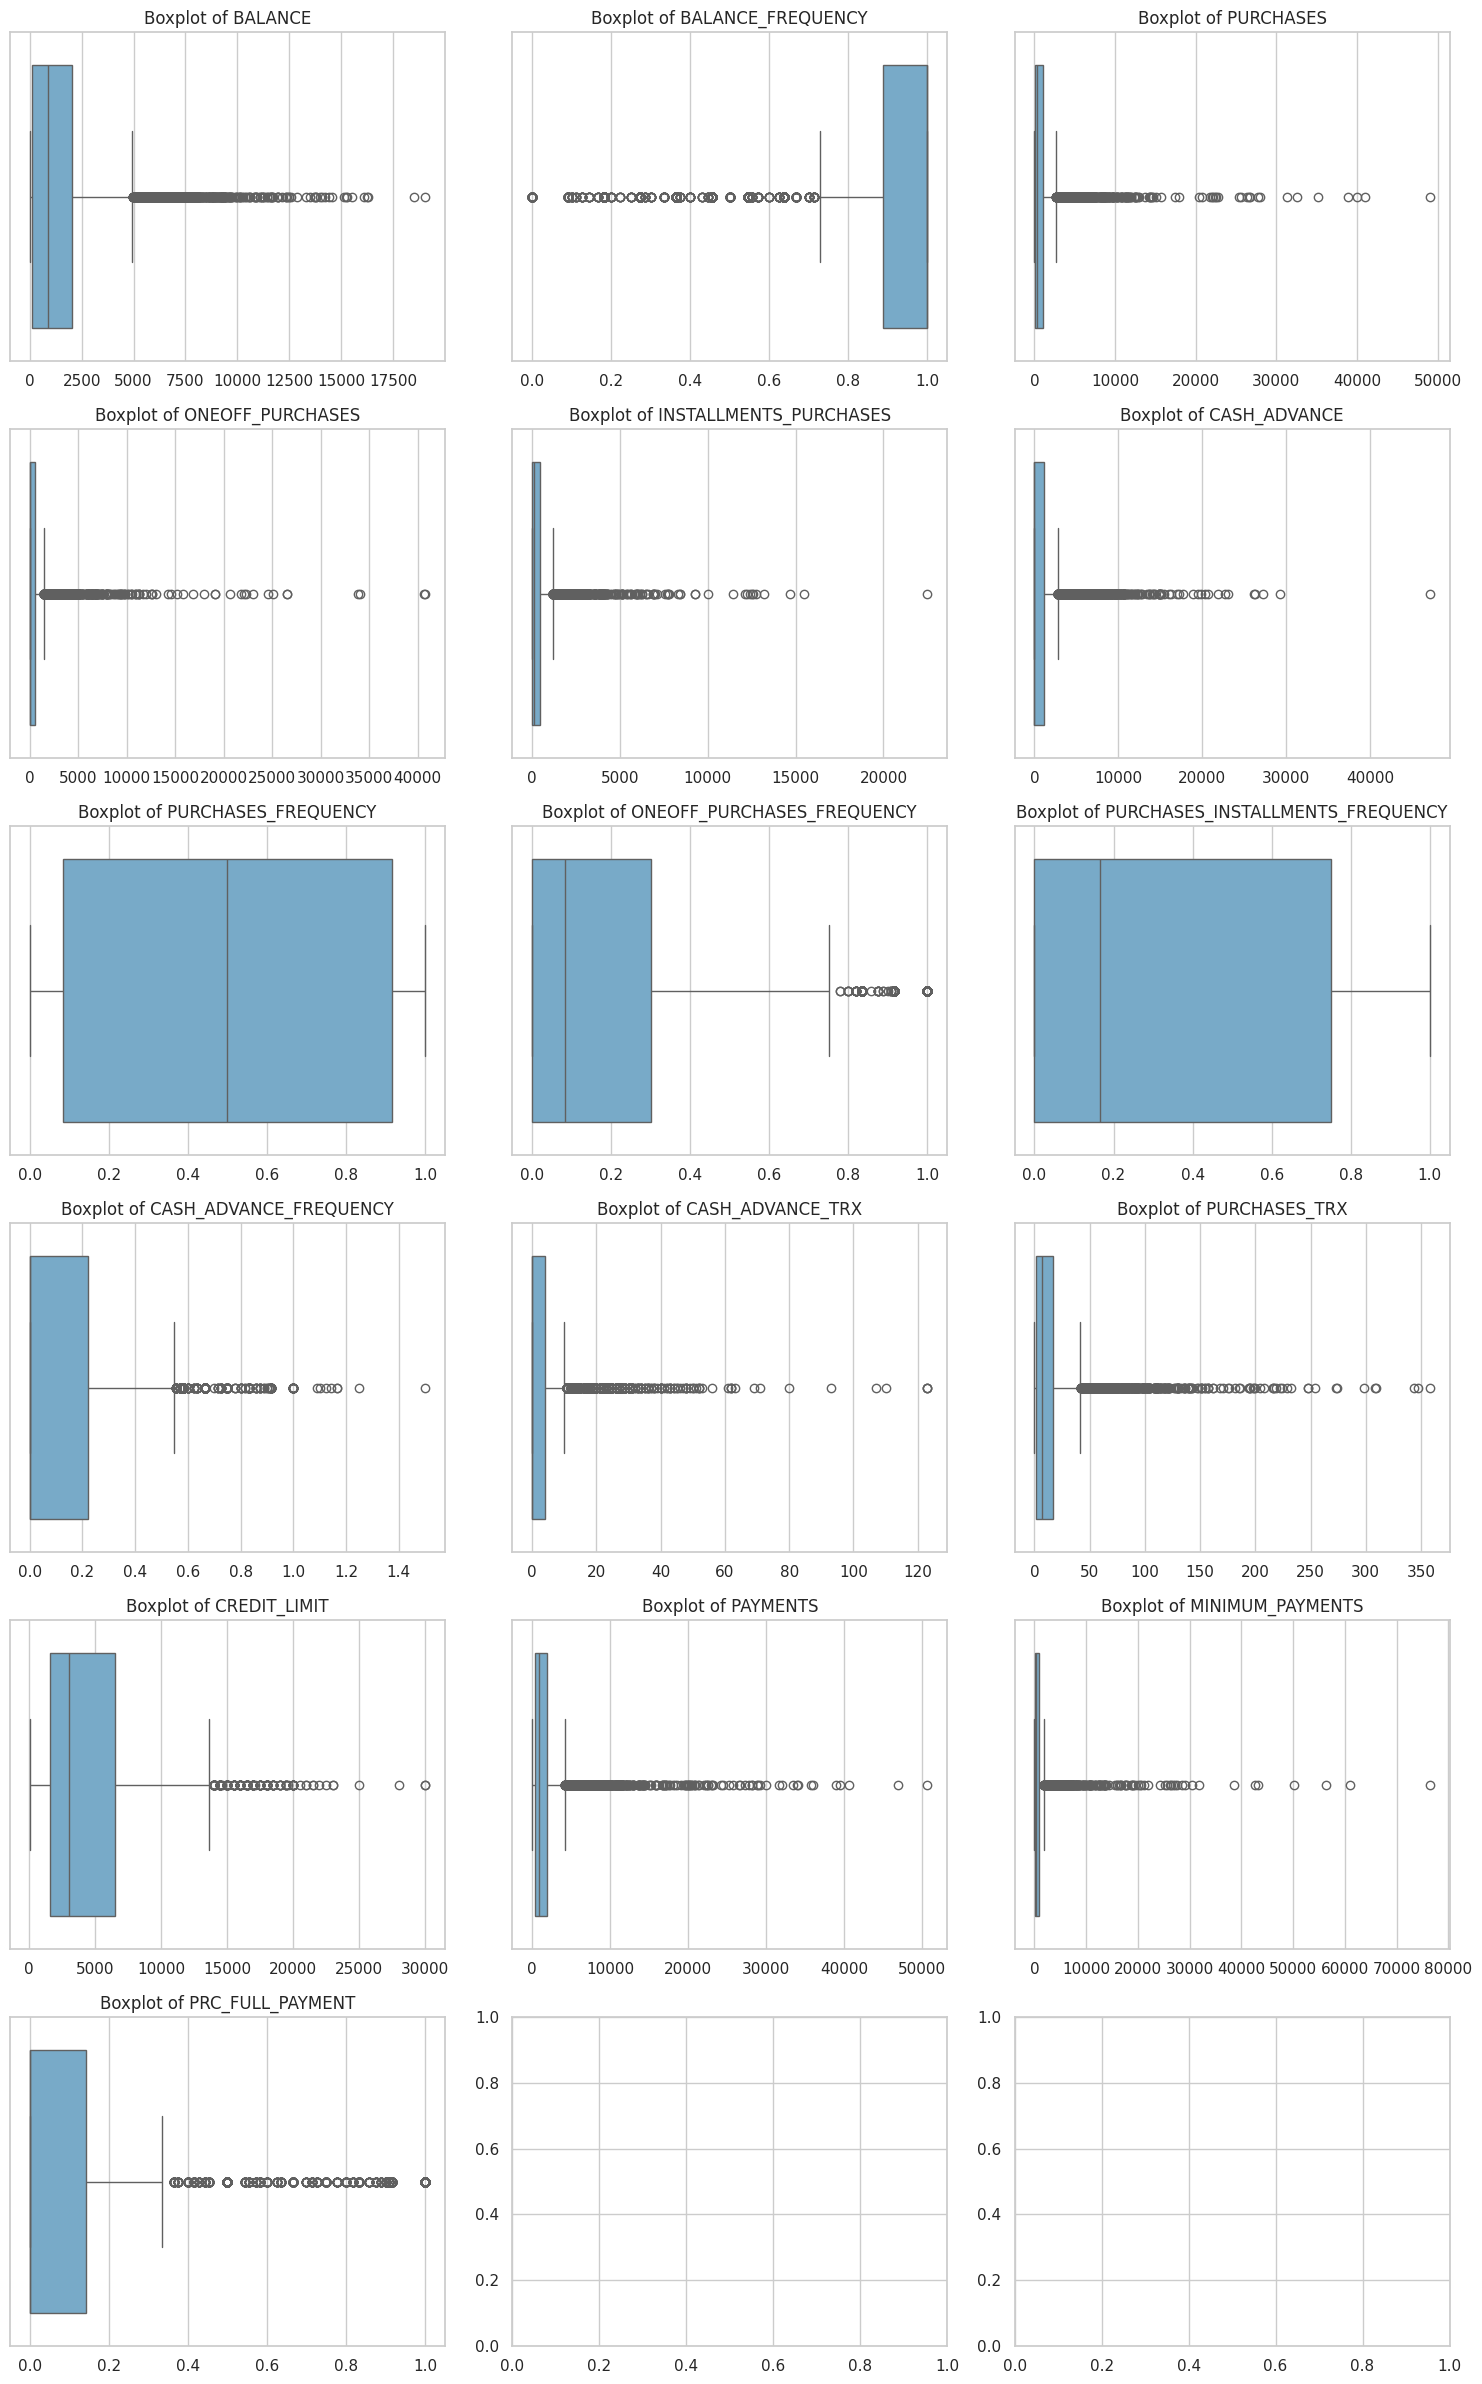

In [60]:
# Set the style of seaborn
sns.set(style="whitegrid")

# number of rows and columns for the subplot grid
num_columns = len(important_columns)
num_rows = (num_columns + 2) // 3

# subplots for histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(important_columns):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set(xlabel=col, ylabel='Density')

# Create subplots for boxplots
fig_box, axes_box = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes for easy iteration
axes_box = axes_box.flatten()

# Plot boxplots
for i, col in enumerate(important_columns):
    sns.boxplot(x=col, ax=axes_box[i], linewidth=1.0, palette='Blues', data=df)
    axes_box[i].set_title(f'Boxplot of {col}')
    axes_box[i].set(xlabel='')

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
data.drop(columns=['PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [62]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
data[skewness_features] = np.log(data[skewness_features] + 0.1)

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 800x600 with 0 Axes>

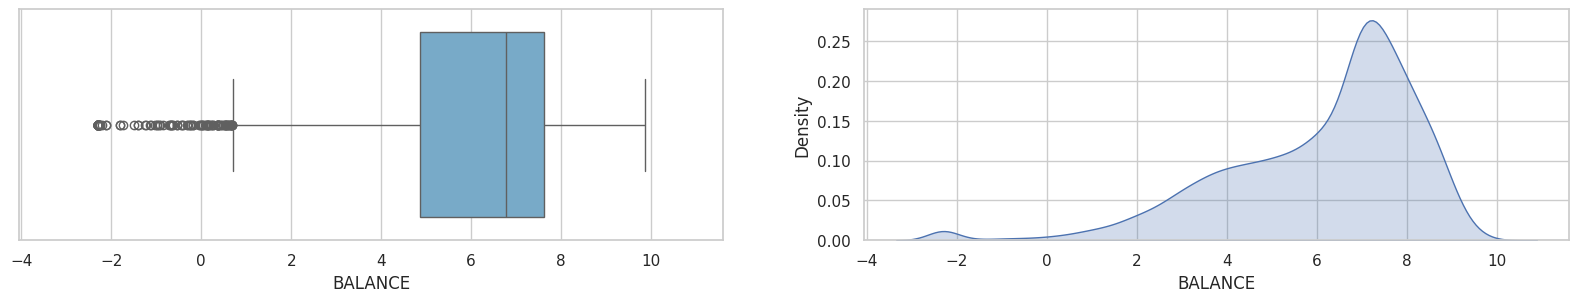

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

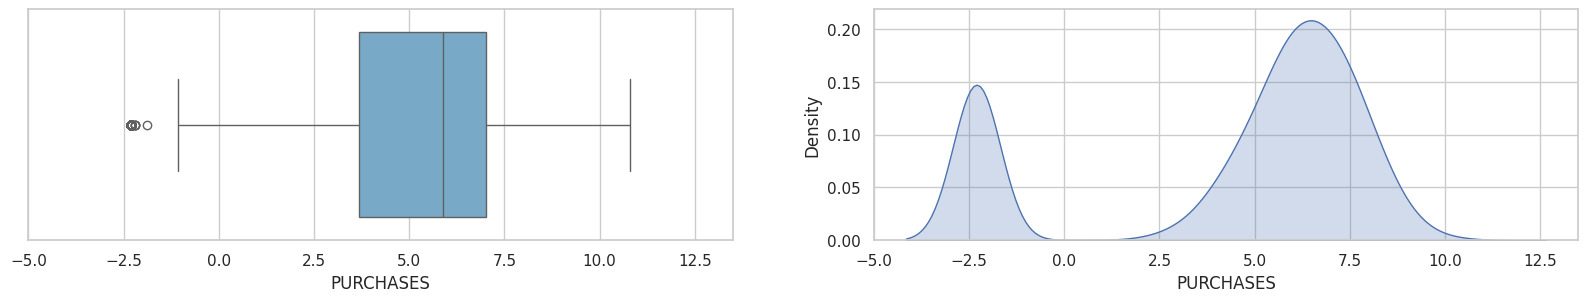

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

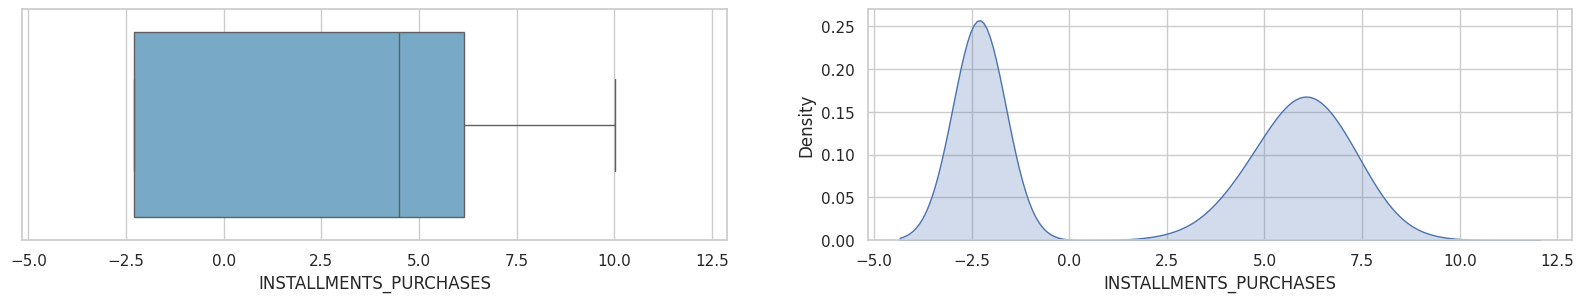

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

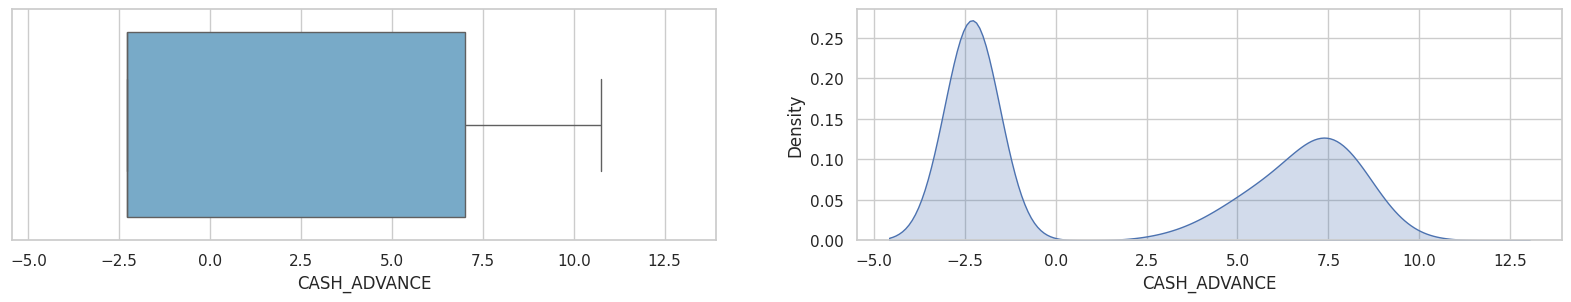

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

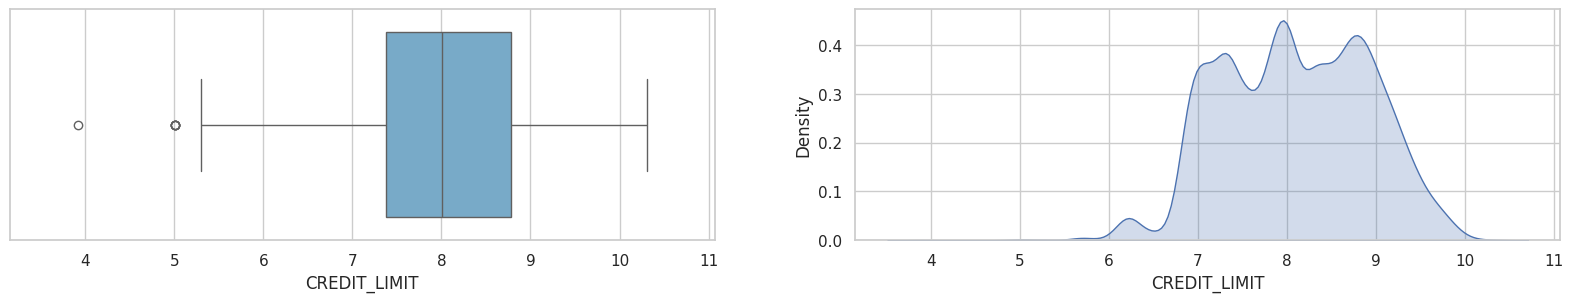

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

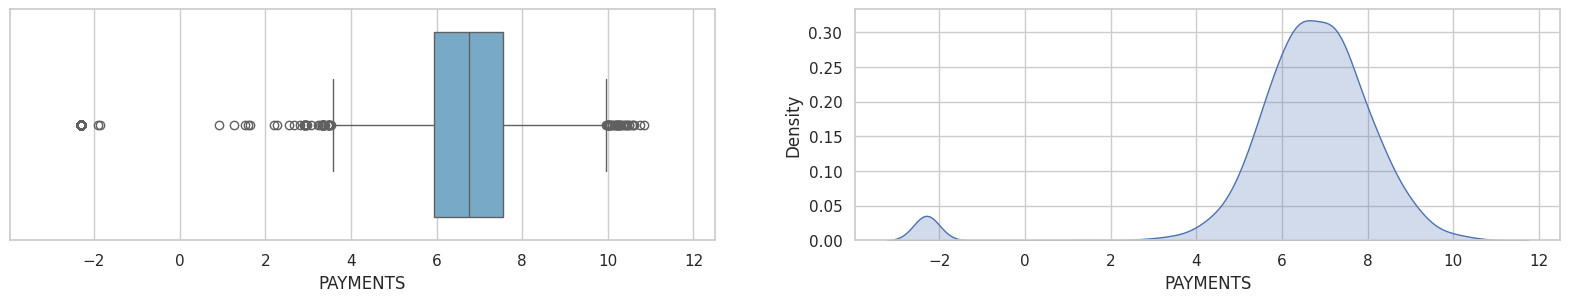

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

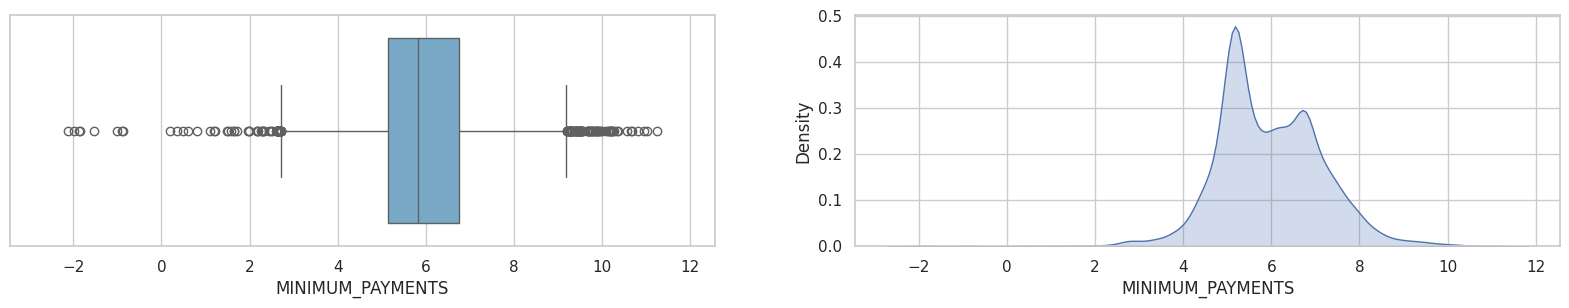

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

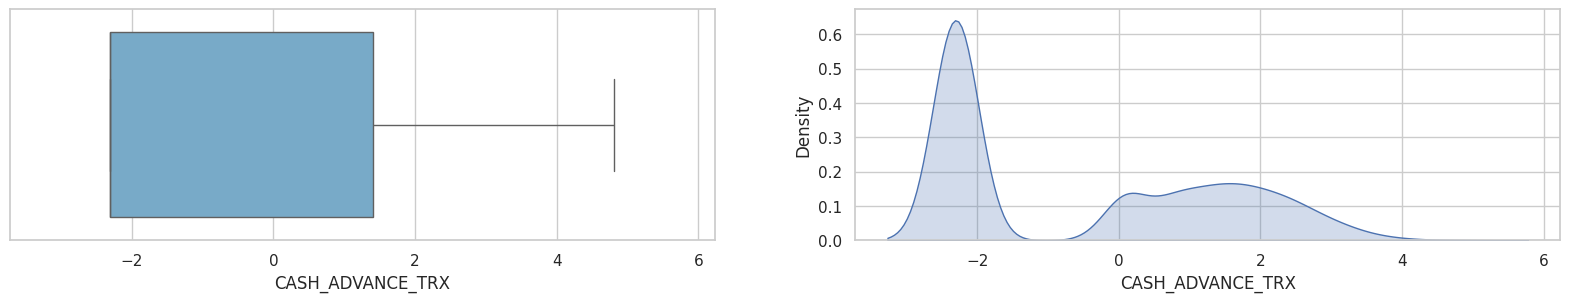

<ipython-input-63-08c5d8bb4603>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
<ipython-input-63-08c5d8bb4603>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');


<Figure size 2000x300 with 0 Axes>

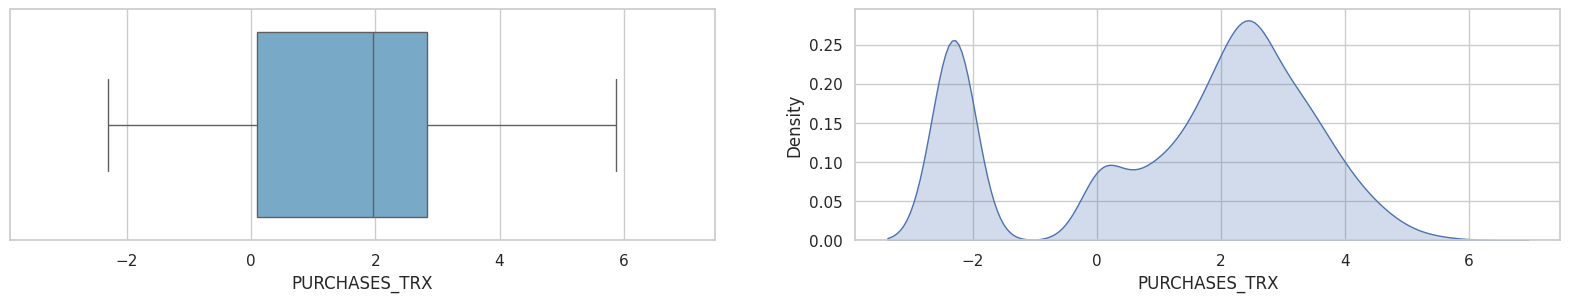

In [63]:
for col in list(data[skewness_features].columns):
    if data[col].nunique() > 7:
        plt.figure();
        rcParams['figure.figsize'] = (20, 3);
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True);
        plt.gca().set(xlabel=col, ylabel='Density');
        sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=data);  # Switched x to y
        sns.kdeplot(data[col], ax=ax_kde, fill=True, palette='Blues');
        plt.show();

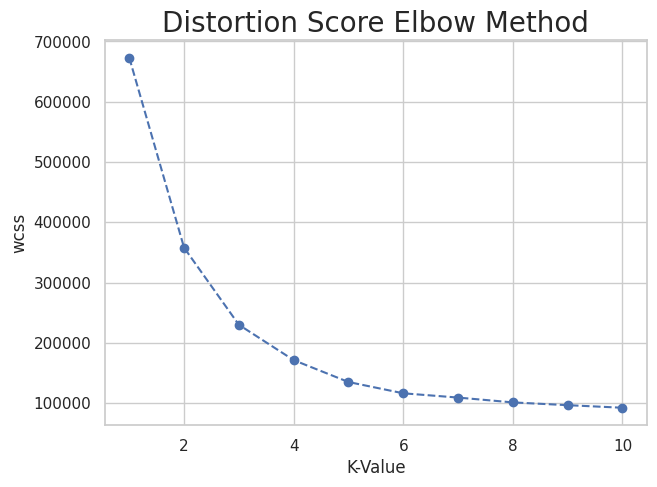

In [64]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

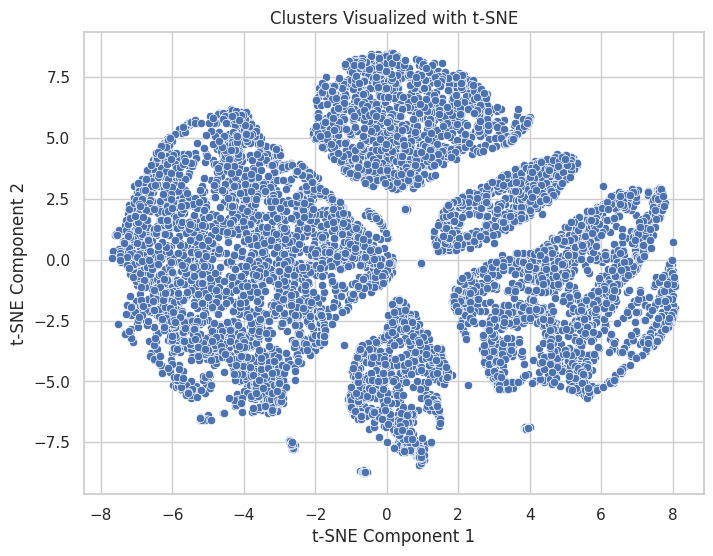

In [65]:
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(data)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [66]:
class K_means:
    def __init__(self, K):
        self.K = K
        self.centroids = None

    def findClosestCentroids(self, X):
        m, _ = X.shape
        closest_centroids = np.zeros(m, dtype=int)

        for i in range(m):
            distances = np.linalg.norm(X.iloc[i].values - self.centroids, axis=1)
            closest_centroids[i] = np.argmin(distances)

        return closest_centroids

    def computeCentroids(self, X, idx):
        centroids = X.groupby(idx).mean().values

        return centroids

    def kMeansInitCentroids(self, X):
        idx = np.random.choice(X.index, self.K, replace=False)
        centroids = X.loc[idx].values

        return centroids

    def KMeans_alg(self, X, initial_centroids=None):
        if initial_centroids is None:
            self.centroids = self.kMeansInitCentroids(X)
        else:
            self.centroids = initial_centroids

        idx = self.findClosestCentroids(X)
        self.centroids = self.computeCentroids(X, idx)

        return self.centroids, idx

    def fit_predict(self, X):
        return self.findClosestCentroids(X)

In [67]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans_amgad = K_means(n_clusters)

# KMeans
centroids, idx = kmeans_amgad.KMeans_alg(data)

# fit
predictions = kmeans_amgad.fit_predict(data)

In [68]:
predictions

array([4, 3, 1, ..., 4, 3, 0])

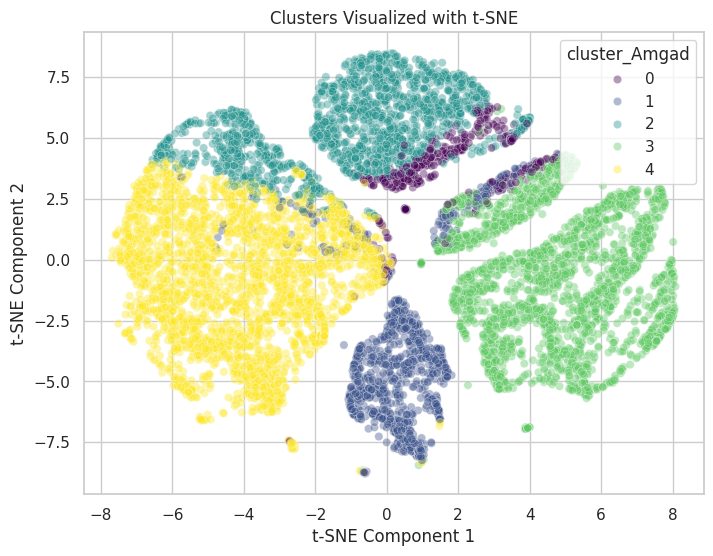

In [69]:
# Add the cluster information to the reduced data
df_tsne['cluster_Amgad'] = predictions

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster_Amgad', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [70]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

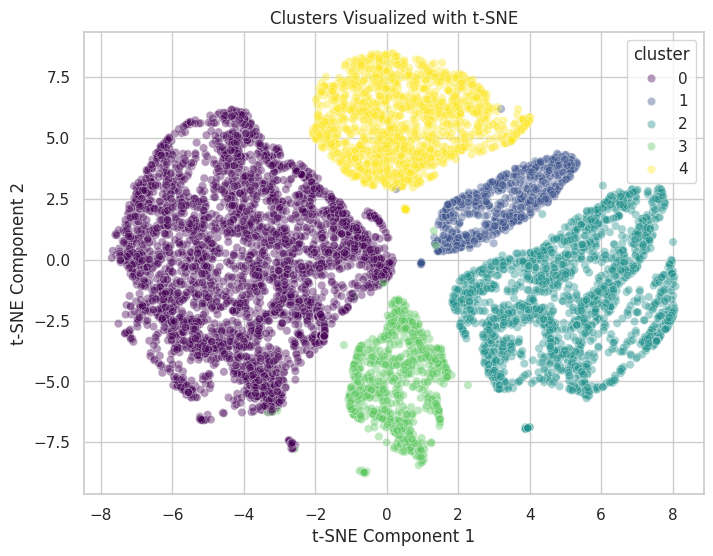

In [71]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()